In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data/ex1data1.txt', delimiter=',')
m = data.shape[0]
# print m
# theta = np.zeros(2).reshape(1,2)
# X = np.array([np.ones(m),data[:,0]]).T
Y = data[:,1].reshape(1,m)

#特征数据标准化
data = feature_norm(data)

X = np.c_[np.ones(m), data[:,0]]
# print X.shape
# print 'X.shape = '+str(X.shape)
# print 'Y.shape = '+str(Y.shape)
# h = np.dot(theta, X.T)
# print 'h.shape = '+str(h.shape)


# print 1.0/(2*m)
# print np.sum(np.square(h-Y))

def cost_fun(X,Y,theta=np.zeros(X.shape[1]).reshape(1,2)):
    """
    X is an two dimen array: each col is a feature,and each row is an example
    """
    H = theta.dot(X.T)
    m  = X.shape[0]
    return 1.0/(2*m)*np.sum(np.square(H-Y))
    
    
def feature_norm(X):
    """
    each col is a feature,and each row is an example
    """
    m = X.shape[0]
    n = X.shape[1]
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_norm = (X-mean)/std
    return X_norm
    
    
def grad_descend(X,Y,theta=np.zeros(2).reshape(1,2),alpha=0.01,num_iters=1000) :
    """
    X is an two dimen array: each col is a feature,and each row is an example
    """
    m = X.shape[0]
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        J_history[iter] = cost_fun(X,Y,theta)
        H = theta.dot(X.T)
#         partial_dirivate = 1.0/m*(H-Y)
        theta = theta - alpha*1.0/m*(H-Y).dot(X)
    return (theta, J_history)
    
    
    
cost_fun(X, Y)
# grad_descend(X, Y)
# print Y
# Y = data[:,1]

32.072733877455676

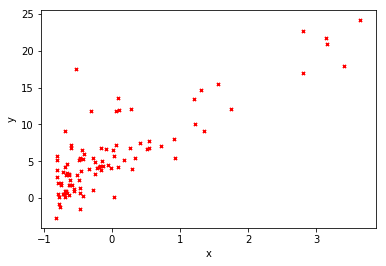

In [106]:
#数据分布
plt.scatter(X[:,1], Y,s=10, c='r', marker='x', linewidths=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

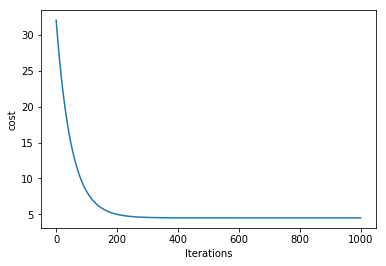

In [107]:
(theta, cost) = grad_descend(X, Y, num_iters=1000)
# plt.ylim(4,10)
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('Iterations')
plt.show()